![](https://github.com/mkhaled146/Uber-Data-Analysis/blob/main/uber%20logo%20map.jpg)


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FFE87C ;font-family:newtimeroman;color:white;font-size:250%;text-align:center;border-radius:50px 1px;">  Uber Data Analysis </p>
 
 <ul style = color:#25383C;font-size:150%;font-family:Serif;>
    <li> Import librarries </li>
    <li> Read dataset</li>
    <li> Data cleaning</li>
    <li> Data visualization</li>
    <li> Data preprocessing</li>
</ul>

In [1]:
#  Import  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from IPython.display import display
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [2]:
# Read  Data 
df = pd.read_csv('UberDataset.csv')

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
973,11/19/2016 13:51,11/19/2016 14:10,Business,Cary,Durham,10.3,Meeting
330,4/24/2016 19:46,4/24/2016 19:52,Business,Chessington,Chessington,1.9,Errand/Supplies
548,7/15/2016 12:09,7/15/2016 12:19,Personal,Banner Elk,Banner Elk,3.2,NaN
929,11-09-2016 21:56,11-09-2016 22:02,Business,Central,Central,1.1,NaN
433,06-12-2016 21:58,06-12-2016 22:19,Business,Parkway,Whitebridge,2.8,Errand/Supplies
967,11/16/2016 20:21,11/16/2016 20:27,Business,Berkeley,El Cerrito,2.3,Temporary Site
33,1/19/2016 10:55,1/19/2016 11:09,Business,Lake Wellingborough,Whitebridge,7.6,Temporary Site
626,08-03-2016 16:00,08-03-2016 16:04,Business,Kalorama Triangle,Downtown,1.5,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN
67,02-04-2016 08:40,02-04-2016 09:01,Business,Cary,Morrisville,5.2,Errand/Supplies


In [6]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Data Cleaning

In [7]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [9]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

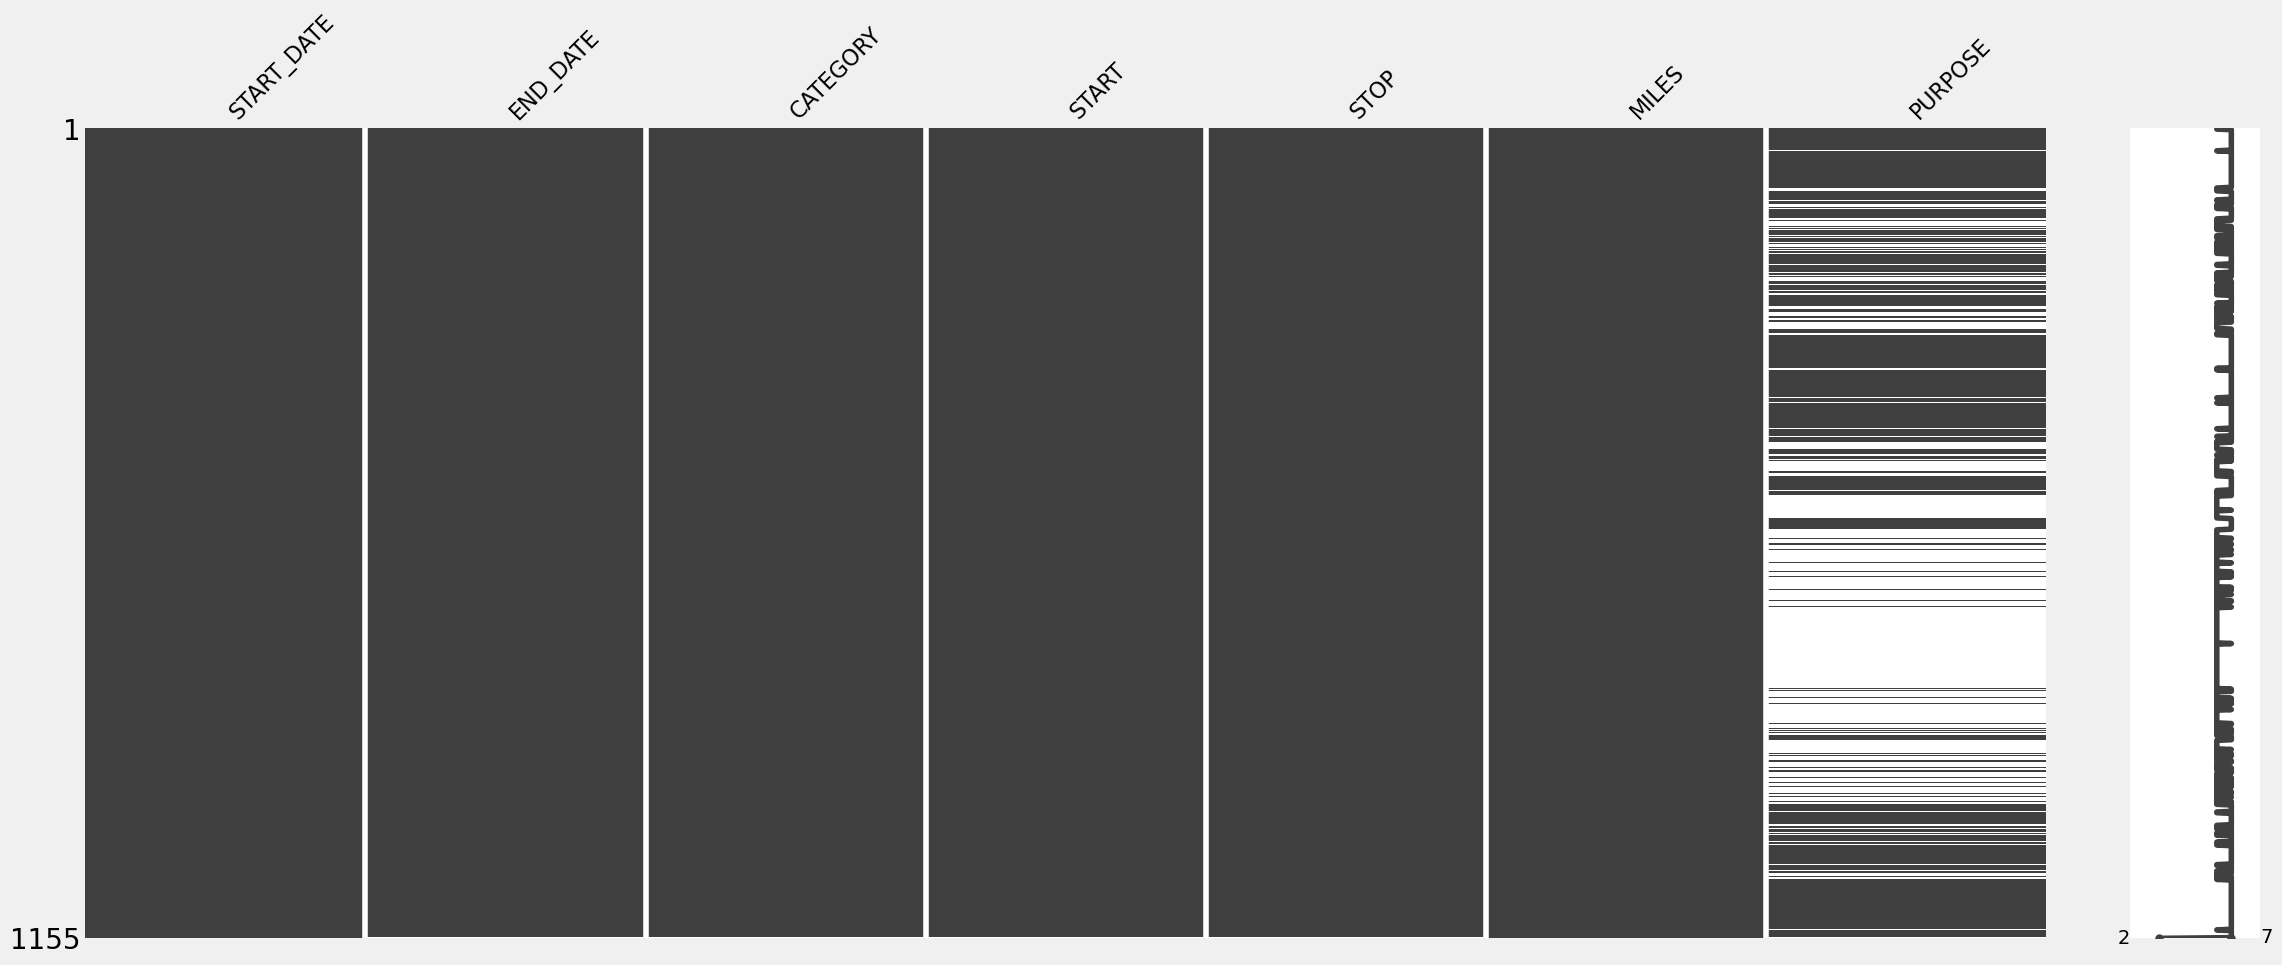

In [11]:
import missingno as msno
msno.matrix(df)

In [12]:
# fill numeric data with median and categorical data with most frequent
numeric_col=[col for col in df.select_dtypes(['int','float'])]
category_col=[col for col in df.select_dtypes(exclude=['int','float'])]

for col in numeric_col:
    df[col].fillna(df[col].median(),inplace=True)
    
for col in category_col:
    df[col].fillna(df[col].value_counts().index[0],inplace=True)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PURPOSE')

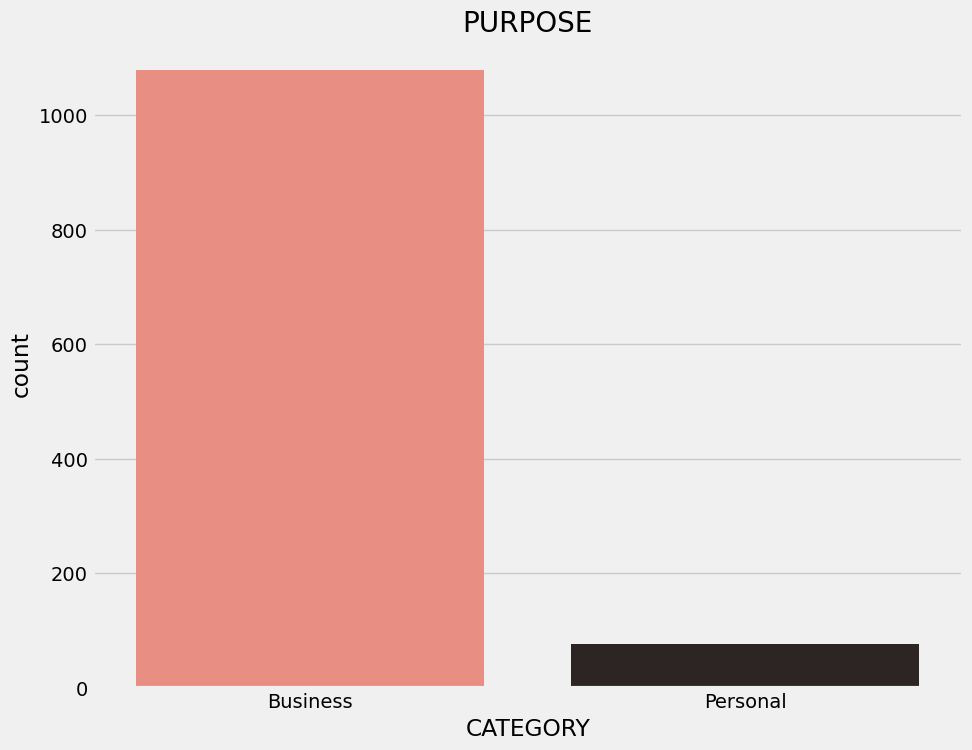

In [17]:
plt.figure(figsize=(10,8))
sns.countplot('CATEGORY',data=df,palette='dark:salmon_r')
plt.title('PURPOSE',size=20)

<AxesSubplot:ylabel='CATEGORY'>

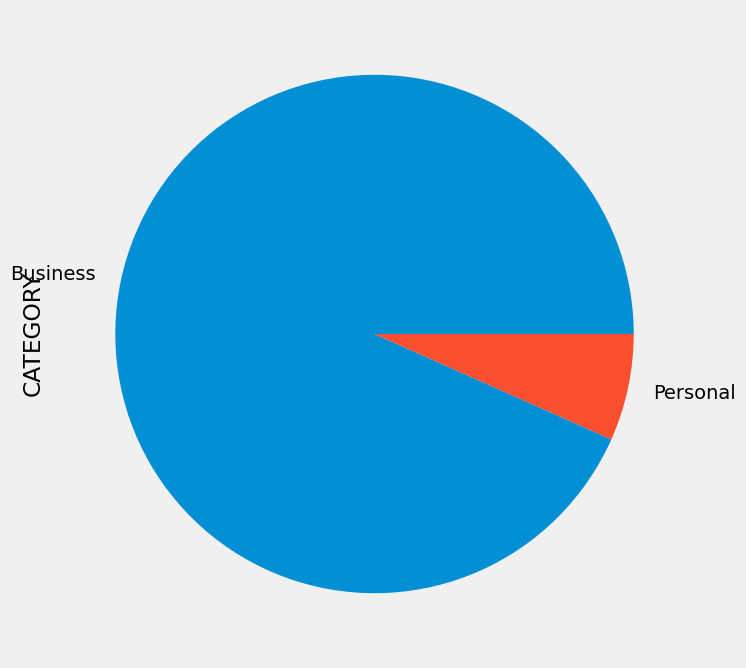

In [20]:
df['CATEGORY'].value_counts().plot.pie()

<AxesSubplot:>

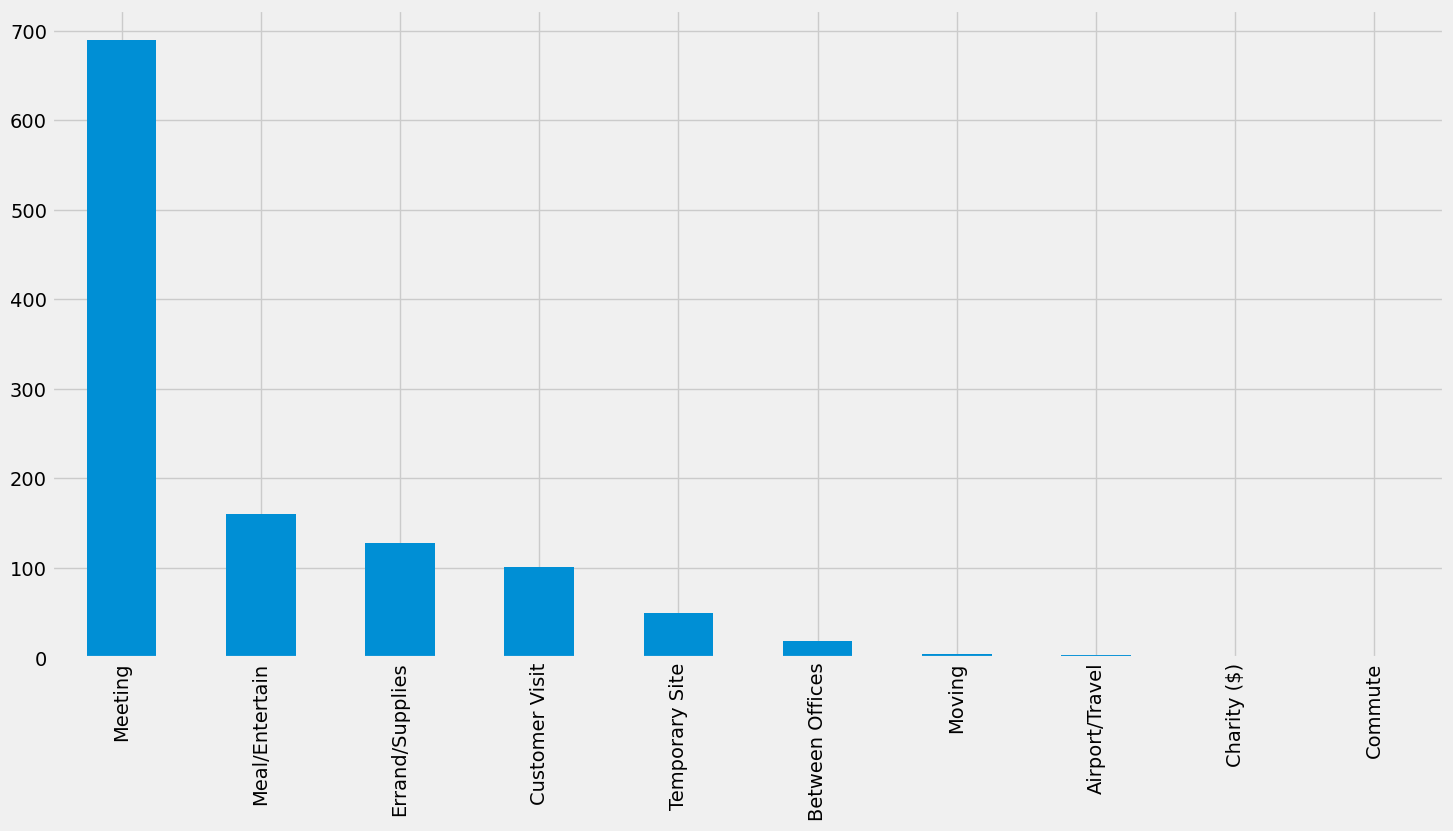

In [23]:
df['PURPOSE'].value_counts().plot.bar()

In [25]:
df.corr()

,MILES
MILES,1.0
